In [46]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns

from sklearn import metrics
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix  


from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier  


In [47]:
pd.options.display.max_columns=100 # to see columns 

In [48]:
df = pd.read_csv('./walmart_sales.csv')

In [49]:
df_sort = df.sort_values(by='Date', ascending=True)

In [50]:
df = df.drop(['Date'], axis=1)
df_sort = df_sort.drop(['Date'], axis=1)

In [51]:
df.head()

Store  Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0      1     1      24924.50          0        42.31       2.572        0.0   
1      1     2      50605.27          0        42.31       2.572        0.0   
2      1     3      13740.12          0        42.31       2.572        0.0   
3      1     4      39954.04          0        42.31       2.572        0.0   
4      1     5      32229.38          0        42.31       2.572        0.0   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  Type  \
0        0.0        0.0        0.0        0.0  211.096358         8.106     1   
1        0.0        0.0        0.0        0.0  211.096358         8.106     1   
2        0.0        0.0        0.0        0.0  211.096358         8.106     1   
3        0.0        0.0        0.0        0.0  211.096358         8.106     1   
4        0.0        0.0        0.0        0.0  211.096358         8.106     1   

     Size  Super_Bowl  Labor_Day  Thanksgiving  Christmas  week  month  year  
0  151315           0          0             0          0     5      2  2010  
1  151315           0          0             0          0     5      2  2010  
2  151315           0          0             0          0     5      2  2010  
3  151315           0          0             0          0     5      2  2010  
4  151315           0          0             0          0     5      2  2010

In [52]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr().abs())    
plt.show()

In [53]:
features = df.drop('Type', axis = 1)
labels = df['Type']

In [54]:
features_sort = df_sort.drop('Type', axis = 1)
labels_sort = df_sort['Type']

In [55]:
x_train1=features[:int(0.7*(len(df)))] 
x_test1= features[int(0.7*(len(df))):] 
y_train1=labels[:int(0.7*(len(df)))] 
y_test1= labels[int(0.7*(len(df))):]

In [56]:
x_train2=features[:int(0.8*(len(df)))] 
x_test2= features[int(0.8*(len(df))):] 
y_train2=labels[:int(0.8*(len(df)))] 
y_test2= labels[int(0.8*(len(df))):]

In [57]:
x_train3=features_sort[:int(0.7*(len(df_sort)))] 
x_test3= features_sort[int(0.7*(len(df_sort))):] 
y_train3=labels_sort[:int(0.7*(len(df_sort)))] 
y_test3= labels_sort[int(0.7*(len(df_sort))):]

TH1: Random Forest 1

In [58]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train1, y_train1)

y_pred_test = pipe.predict(x_test1)

pipe.score(x_test1,y_test1)

0.7144386978042899

In [59]:
cm = metrics.confusion_matrix(y_test1,y_pred_test)

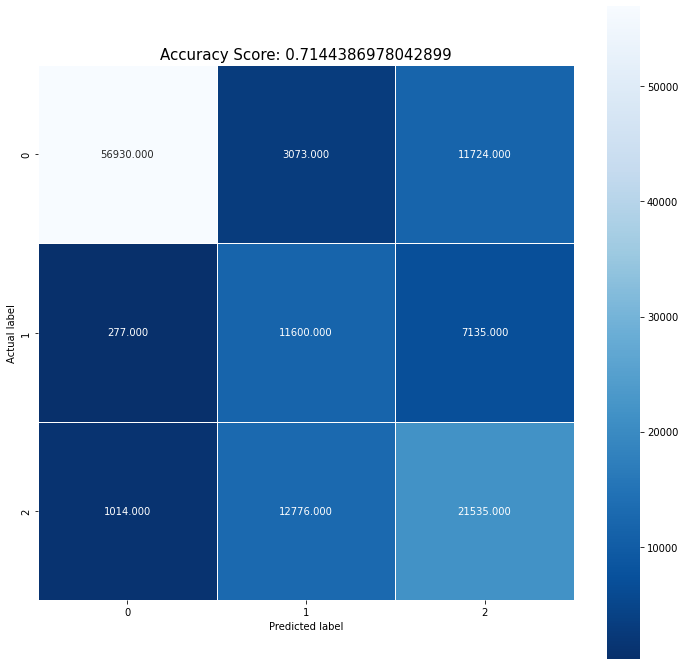

In [60]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test1,y_test1))
plt.title(title, size = 15);

Random Forest 2

In [61]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train2, y_train2)

y_pred_test = pipe.predict(x_test2)

pipe.score(x_test2,y_test2)

0.5895315493259403

In [62]:
cm = metrics.confusion_matrix(y_test2,y_pred_test)

In [63]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test2,y_test2))
plt.title(title, size = 15);

Random Forest 3

In [64]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train3, y_train3)

y_pred_test = pipe.predict(x_test3)

pipe.score(x_test3,y_test3)

0.9983817743368448

In [65]:
cm = metrics.confusion_matrix(y_test3,y_pred_test)

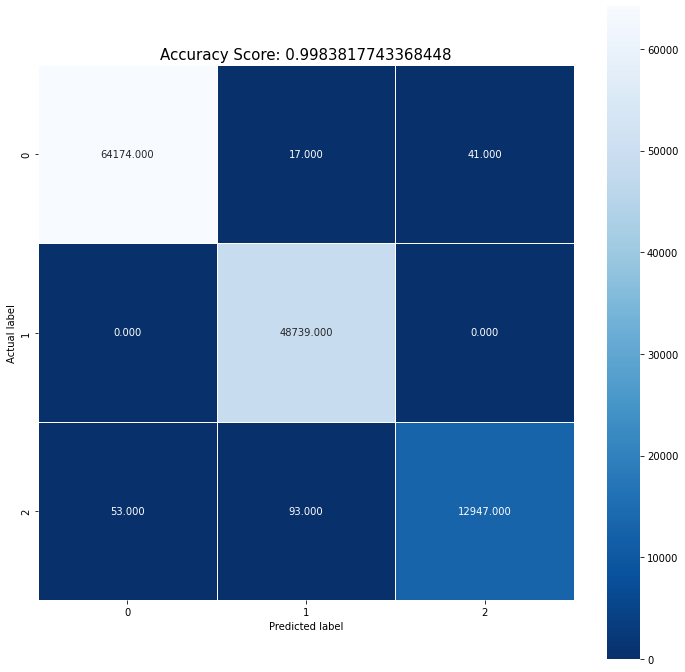

In [66]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test3,y_test3))
plt.title(title, size = 15);

TH2: Naive Bayes 1

In [67]:
classifier= GaussianNB()  
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train1, y_train1)

y_pred_test = pipe.predict(x_test1)

pipe.score(x_test1,y_test1)

0.4948200913821551

In [68]:
cm = metrics.confusion_matrix(y_test1,y_pred_test)

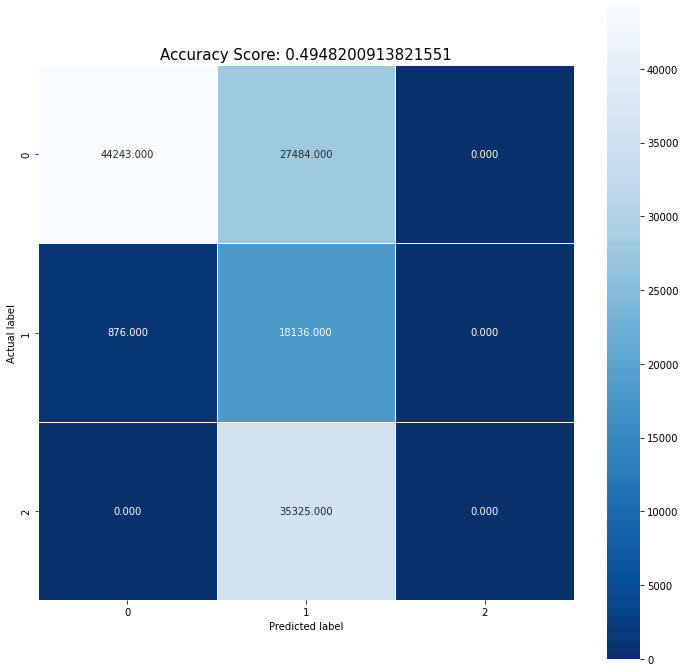

In [69]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test1,y_test1))
plt.title(title, size = 15);

Naive Bayes 2

In [70]:
classifier= GaussianNB()  
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train2, y_train2)

y_pred_test = pipe.predict(x_test2)

pipe.score(x_test2,y_test2)

0.45325607129683615

In [71]:
cm = metrics.confusion_matrix(y_test2,y_pred_test)

In [72]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test2,y_test2))
plt.title(title, size = 15);

Naive Bayes 3

In [73]:
classifier= GaussianNB()  
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train3, y_train3)

y_pred_test = pipe.predict(x_test3)

pipe.score(x_test3,y_test3)

0.6776478614037315

In [74]:
cm = metrics.confusion_matrix(y_test3,y_pred_test)

In [75]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test3,y_test3))
plt.title(title, size = 15);

TH3: Decison Tree (ID3)

In [76]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train1, y_train1)

y_pred = pipe.predict(x_train1)

y_pred_test = pipe.predict(x_test1)

pipe.score(x_test1,y_test1)

0.7486435461352964

In [77]:
cm = metrics.confusion_matrix(y_test1,y_pred_test)

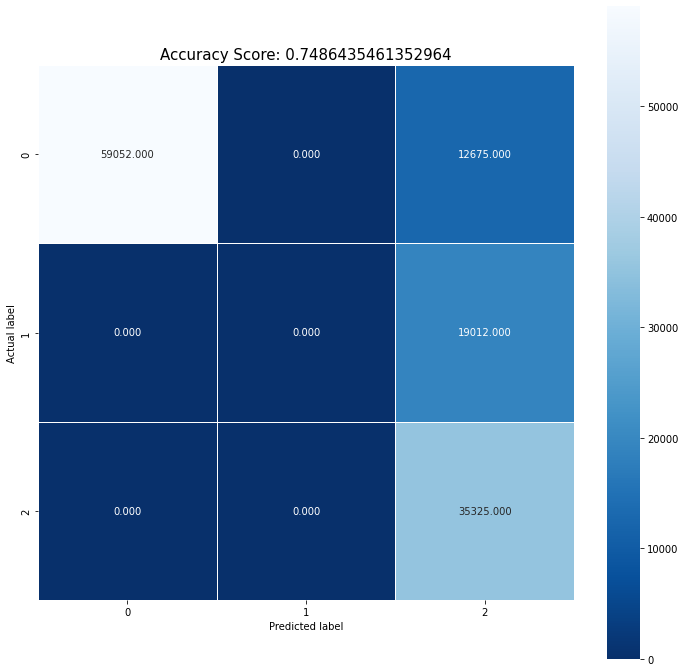

In [78]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test1,y_test1))
plt.title(title, size = 15);

Decison Tree (ID3) 2

In [79]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train2, y_train2)

y_pred = pipe.predict(x_train2)

y_pred_test = pipe.predict(x_test2)

pipe.score(x_test2,y_test2)

0.5796794498054567

In [80]:
cm = metrics.confusion_matrix(y_test2,y_pred_test)

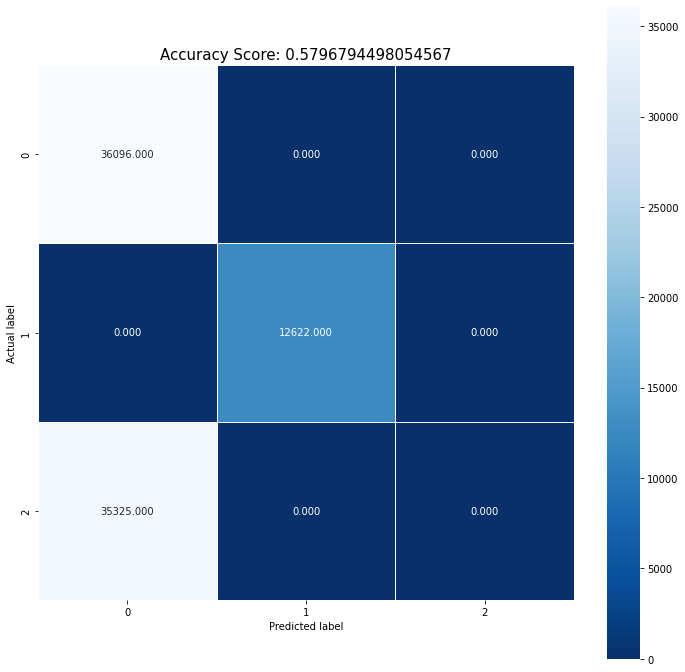

In [81]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test2,y_test2))
plt.title(title, size = 15);

Decision Tree (ID3) 3

In [82]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train3, y_train3)

y_pred = pipe.predict(x_train3)

y_pred_test = pipe.predict(x_test3)

pipe.score(x_test3,y_test3)

1.0

In [83]:
cm = metrics.confusion_matrix(y_test3,y_pred_test)

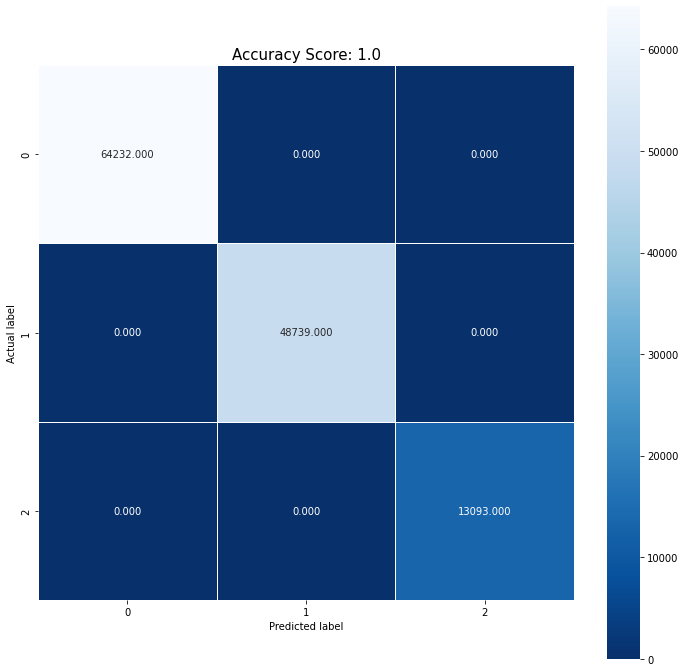

In [84]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test3,y_test3))
plt.title(title, size = 15);

TH4: Decison Tree (CART) 1

In [85]:
classifier= DecisionTreeClassifier(criterion='gini', random_state=0)   
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train1, y_train1)

y_pred = pipe.predict(x_train1)

y_pred_test = pipe.predict(x_test1)

pipe.score(x_test1,y_test1)

0.7486435461352964

In [86]:
cm = metrics.confusion_matrix(y_test1,y_pred_test)

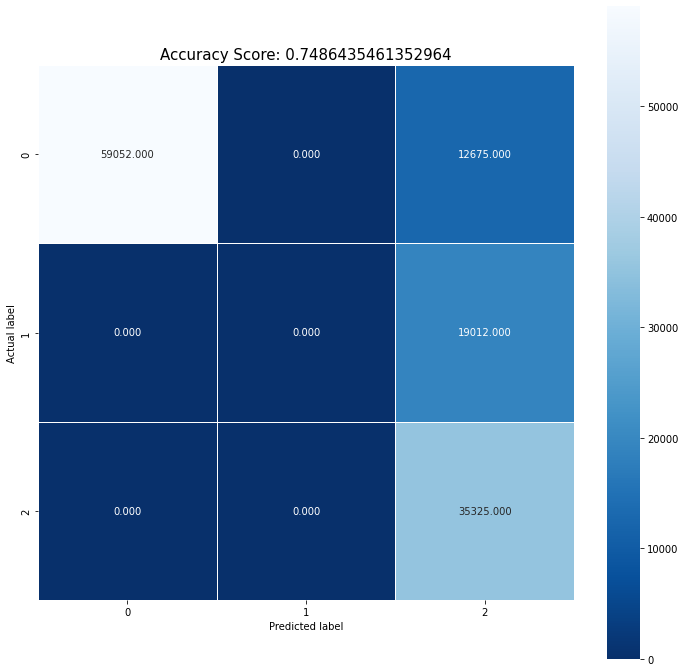

In [87]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test1,y_test1))
plt.title(title, size = 15);

Decision Tree (CART) 2

In [88]:
classifier= DecisionTreeClassifier(criterion='gini', random_state=0)   
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train2, y_train2)

y_pred = pipe.predict(x_train2)

y_pred_test = pipe.predict(x_test2)

pipe.score(x_test2,y_test2)

0.5796794498054567

In [89]:
cm = metrics.confusion_matrix(y_test2,y_pred_test)

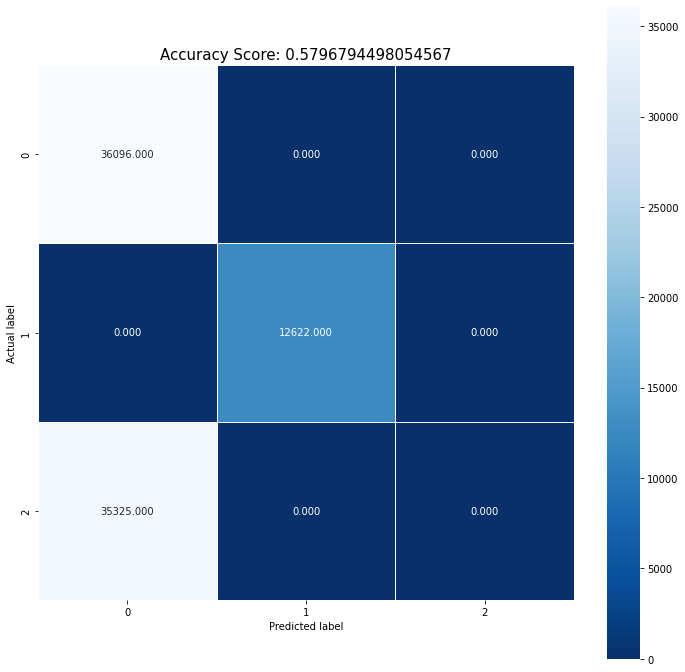

In [90]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test2,y_test2))
plt.title(title, size = 15);

Decison Tree (CART) 3

In [91]:
classifier= DecisionTreeClassifier(criterion='gini', random_state=0)   
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train3, y_train3)

y_pred = pipe.predict(x_train3)

y_pred_test = pipe.predict(x_test3)

pipe.score(x_test3,y_test3)

1.0

In [92]:
cm = metrics.confusion_matrix(y_test3,y_pred_test)

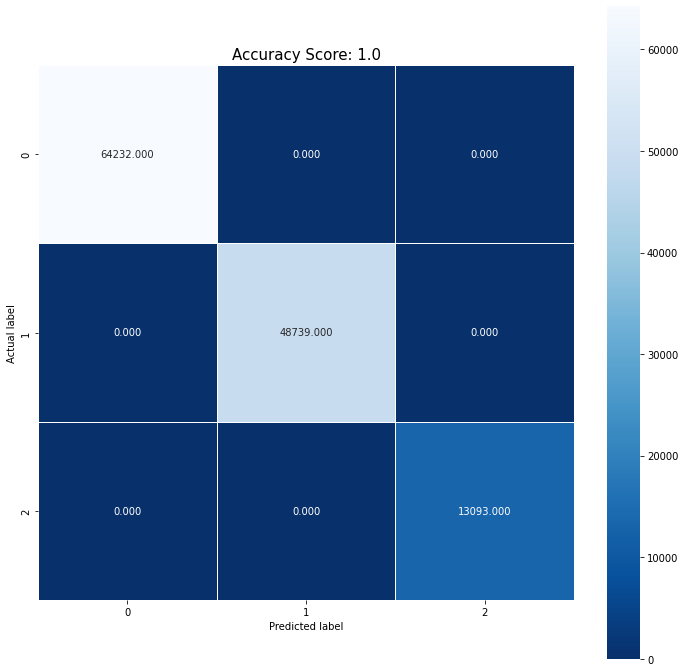

In [93]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test3,y_test3))
plt.title(title, size = 15);